<a href="https://colab.research.google.com/github/Cha21010/Final_Project/blob/main/our_cse_351_Movie_Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>By: Scott Zheng, Ronghao Zeng, Wei Qi<h3/>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as plt
import matplotlib.pyplot as pyplt
import seaborn as sns
import calendar
import statistics

Some of the columns contain lists and dictionaries. Extract information you need and reformat them. -- Scott Zheng



In [ ]:
# Read the data from the file, and create a DataFrame object as movies_data.
movie_data = pd.read_csv("/content/tmdb_5000_movies.csv")
# Read the data from the file, and create a DataFrame object as credit_data.
credit_data = pd.read_csv("/content/tmdb_5000_credits.csv")


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# extract the information we need from the columns in movie data set
movie_data["genres"] = movie_data["genres"].apply(lambda x : [i["name"] for i in eval(x)])
movie_data["keywords"] = movie_data["keywords"].apply(lambda x : [i["name"] for i in eval(x)])
movie_data["production_companies"] = movie_data["production_companies"].apply(lambda x : [i["name"] for i in eval(x)])
movie_data["production_countries"] = movie_data["production_countries"].apply(lambda x : [i["name"] for i in eval(x)])
movie_data["spoken_languages"] = movie_data["spoken_languages"].apply(lambda x : [i["name"] for i in eval(x)])
# Extract the information we need from the columns in the credit data set
credit_data["cast"] = credit_data["cast"].apply(lambda x : [i["name"] for i in eval(x)])
credit_data["crew"] = credit_data["crew"].apply(lambda x : [i["job"] + " : " + i["name"] for i in eval(x)])
# Merge two datasets base on the movies' id number, and combine the repeated columns.
raw_data = pd.merge(movie_data, credit_data.drop("title", 1), left_on = "id", right_on = "movie_id").drop("movie_id", 1)
print(raw_data)

         budget                                         genres  \
0     237000000  [Action, Adventure, Fantasy, Science Fiction]   
1     300000000                   [Adventure, Fantasy, Action]   
2     245000000                     [Action, Adventure, Crime]   
3     250000000               [Action, Crime, Drama, Thriller]   
4     260000000           [Action, Adventure, Science Fiction]   
...         ...                                            ...   
4798     220000                      [Action, Crime, Thriller]   
4799       9000                              [Comedy, Romance]   
4800          0             [Comedy, Drama, Romance, TV Movie]   
4801          0                                             []   
4802          0                                  [Documentary]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2     

<ipython-input-27-4f591fb4c0ab>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  raw_data = pd.merge(movie_data, credit_data.drop("title", 1), left_on = "id", right_on = "movie_id").drop("movie_id", 1)
<ipython-input-27-4f591fb4c0ab>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  raw_data = pd.merge(movie_data, credit_data.drop("title", 1), left_on = "id", right_on = "movie_id").drop("movie_id", 1)


* <h4>Clean the dataset, remove the outliers, before any data analysis. Explain what you did. -- Scott Zheng

In [ ]:
# Clean the dataset, and remove the outliers.
data = raw_data[(raw_data["budget"] > 0) &
(raw_data["original_title"].notna()) &
(raw_data["popularity"] > 0) &
(raw_data["production_companies"].str.len() > 0) &
(raw_data["production_countries"].str.len() > 0) &
(raw_data["release_date"].notna()) &
(raw_data["revenue"] > 0) &
(raw_data["runtime"] > 0) &
(raw_data["cast"].str.len() > 0) &
(raw_data["crew"].str.len() > 0)]

In the data cleaning process, one must remove outliers resulting from artifacts. We need to ensure that the model we create predicts movie revenue accurately, so we cannot have zero budget or revenue values. It is also nonsensical for a movie's runtime to be zero. We rely on the "original_title", "cast", and "crew" columns to guarantee the data's credibility. Additionally, the columns "production_companies" and "production_countries" provide crucial information for our intended model. Now that we have cleaned the data, we can proceed with our analysis.

In [ ]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,3.183000e+03,3183.000000,3183.000000,3.183000e+03,3183.000000,3183.000000,3183.000000
mean,4.113039e+07,44878.875589,29.415936,1.229086e+08,110.859881,6.315112,991.026076
std,4.450600e+07,75046.011568,36.283411,1.871212e+08,20.991509,0.868237,1419.826830
min,1.000000e+00,5.000000,0.037073,5.000000e+00,41.000000,0.000000,0.000000
25%,1.100000e+07,4884.500000,10.812450,1.770142e+07,96.000000,5.800000,189.000000
50%,2.600000e+07,11361.000000,20.786616,5.693230e+07,107.000000,6.300000,484.000000
75%,5.500000e+07,45038.500000,37.689512,1.487174e+08,121.000000,6.900000,1161.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


#<h4>Count the number of movies released by day of week, month and year, are there any patterns that you observe?  -- Ronghao Zeng

<ipython-input-21-0a24103c46b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["release_day_of_week"] = days_of_week


release_day_of_week
Friday       1304
Thursday      665
Wednesday     593
Tuesday       223
Monday        157
Saturday      129
Sunday        112
dtype: int64


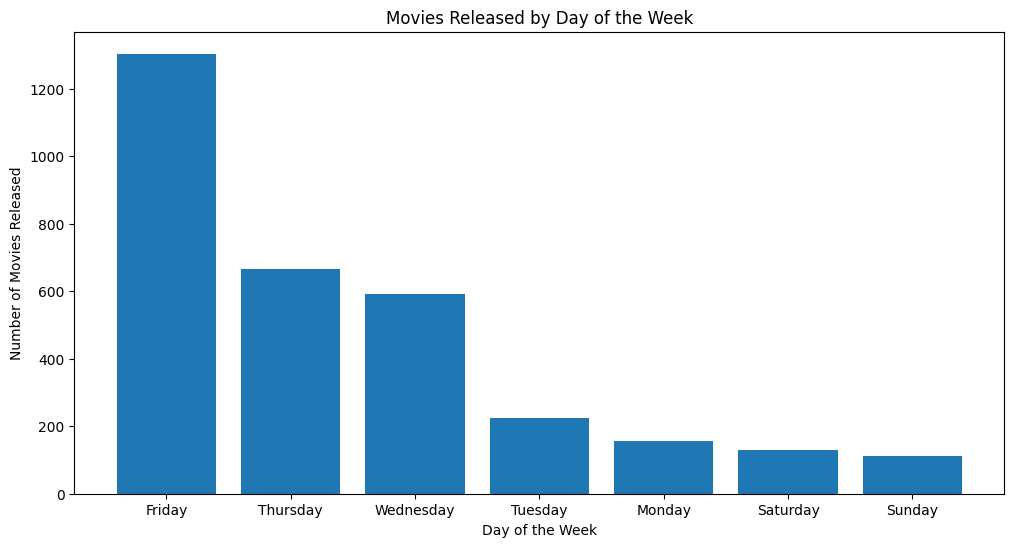

In [ ]:
days_of_week = []
for release_date in data['release_date']:
    weekday = datetime.datetime.strptime(release_date, '%Y-%m-%d').weekday()
    day_name = calendar.day_name[weekday]
    days_of_week.append(day_name)
data["release_day_of_week"] = days_of_week
grouped_by_day = data.groupby('release_day_of_week').size()
sorted_group = grouped_by_day.sort_values(ascending=False)  # sort in descending order
print(sorted_group)

# draw bar graph
pyplt.figure(figsize=(12, 6))
pyplt.bar(sorted_group.index, sorted_group.values)
pyplt.xlabel('Day of the Week')
pyplt.ylabel('Number of Movies Released')
pyplt.title('Movies Released by Day of the Week')
pyplt.show()

<ipython-input-8-263a3a37307c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["release_day_of_month"] = days_of_month


release_day_of_month
25    152
1     136
22    123
13    123
12    120
11    120
9     119
10    118
16    117
15    116
18    116
7     113
6     112
17    110
21    107
14    104
19    104
20    101
26     97
24     97
23     96
30     92
8      90
5      86
2      85
27     85
4      80
3      79
28     77
29     61
31     47
Name: budget, dtype: int64


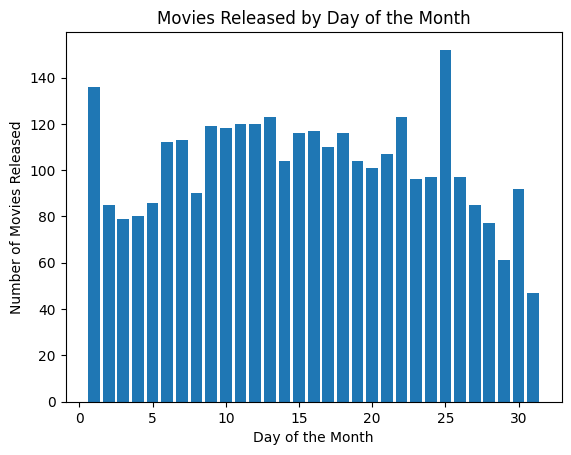

In [ ]:
days_of_month = []
for release_date in data['release_date']:
    day = datetime.datetime.strptime(release_date, '%Y-%m-%d').day
    days_of_month.append(day)
data["release_day_of_month"] = days_of_month
grouped_by_day = data.groupby('release_day_of_month').budget.count()
sorted_group = grouped_by_day.sort_values(ascending=False)  # sort in descending order
print(sorted_group)

# draw bar graph
pyplt.bar(sorted_group.index, sorted_group.values)
pyplt.xlabel('Day of the Month')
pyplt.ylabel('Number of Movies Released')
pyplt.title('Movies Released by Day of the Month')
pyplt.show()

* <h4>What are the movie genre trend shifting patterns that you can observe from the dataset? -- Ronghao Zeng

In [ ]:
days_of_year = []
for release_date in data['release_date']:
    day_of_year = datetime.datetime.strptime(release_date, '%Y-%m-%d').timetuple().tm_yday
    days_of_year.append(day_of_year)
data["release_day_of_year"] = days_of_year
grouped_by_day = data.groupby('release_day_of_year').budget.count()
sorted_group = grouped_by_day.sort_values(ascending=False)
# convert day of year to date format
dates = [datetime.datetime.strptime(f"2023-{d}", '%Y-%j').strftime('%b %d') for d in sorted_group.index]
# create DataFrame with dates and movie counts
df = pd.DataFrame({'date': dates, 'movie_count': sorted_group.values})
# print DataFrame
print(df)

       date  movie_count
0    Dec 25           43
1    Sep 09           26
2    Sep 10           22
3    Dec 10           19
4    Sep 11           19
..      ...          ...
359  Nov 29            2
360  Jan 04            1
361  Jan 03            1
362  Dec 29            1
363  Dec 31            1

[364 rows x 2 columns]


<ipython-input-16-521e5180019f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["release_day_of_year"] = days_of_year


In [ ]:
# Get all the genre type in the dataset
distinct_genres = {genre for sublist in data["genres"] for genre in sublist}
distinct_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller',
 'War',
 'Western'}

In [ ]:
all_info = {}
for genre in distinct_genres:
    popularity_list = []
    for idx in range(len(data["popularity"])):
        current_genres = data["genres"].get(idx)
        if current_genres is not None and genre in current_genres:
            popularity_list.append(data["popularity"].get(idx))
    all_info[genre] = popularity_list

# Remove genres with no popularity
filtered_all_info = {k: v for k, v in all_info.items() if v}
all_info = filtered_all_info
genres = [key for key in all_info.keys()]
genres

['Animation',
 'Horror',
 'Music',
 'Mystery',
 'Documentary',
 'History',
 'Comedy',
 'Adventure',
 'Science Fiction',
 'War',
 'Romance',
 'Western',
 'Thriller',
 'Crime',
 'Family',
 'Drama',
 'Fantasy',
 'Action']

<ipython-input-12-5b33ea6b4548>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, "year"] = pd.to_datetime(data["release_date"]).dt.year


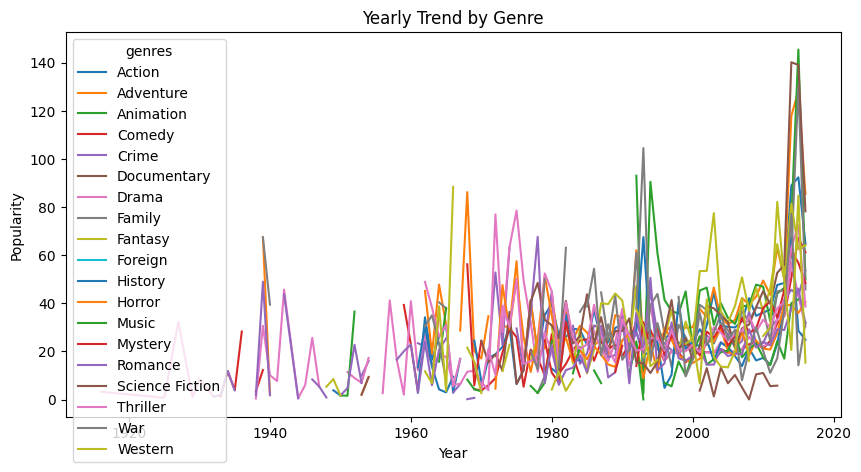

In [ ]:
data.loc[:, "year"] = pd.to_datetime(data["release_date"]).dt.year
data_copy = data.copy()
exploded_data = data_copy.explode('genres')
grouped_data = exploded_data.groupby(["genres", "year"])
popularity = grouped_data["popularity"].mean()
pivot_table = popularity.unstack(level=0)
pivot_table.plot(figsize=(10, 5))
pyplt.xlabel("Year")
pyplt.ylabel("Popularity")
pyplt.title("Yearly Trend by Genre")
pyplt.show()

In [ ]:
# Uses previous dictionary to get medians and means for each genre
median_dict = {}
mean_dict = {}
for genre in genres:
    info_list = all_info.get(genre)
    if info_list:
        median_dict[genre] = statistics.median(info_list)
        mean_dict[genre] = statistics.mean(info_list)
median_values_list = [value for value in median_dict.values()]
mean_values_list = [value for value in mean_dict.values()]
rounded_median_values = [round(value, 2) for value in median_values_list]
rounded_mean_values = [round(value, 2) for value in mean_values_list]

Text(0.5, 36.72222222222221, 'Genres')

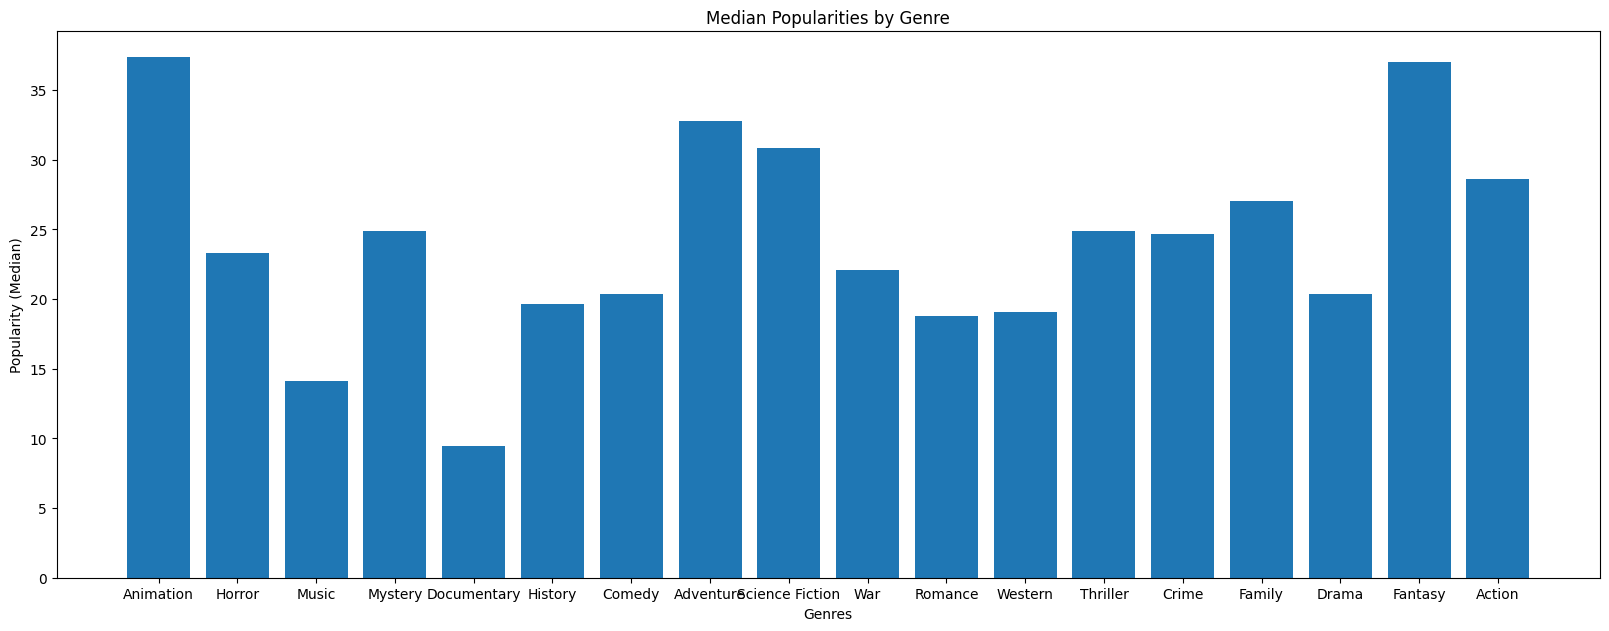

In [ ]:
# Plot data
pyplt.figure(figsize=(16, 6))
pyplt.bar(x=genres,height=rounded_median_values)
pyplt.tight_layout()
pyplt.title("Median Popularities by Genre")
pyplt.ylabel("Popularity (Median)")
pyplt.xlabel("Genres")

Text(0.5, 36.72222222222221, 'Genres')

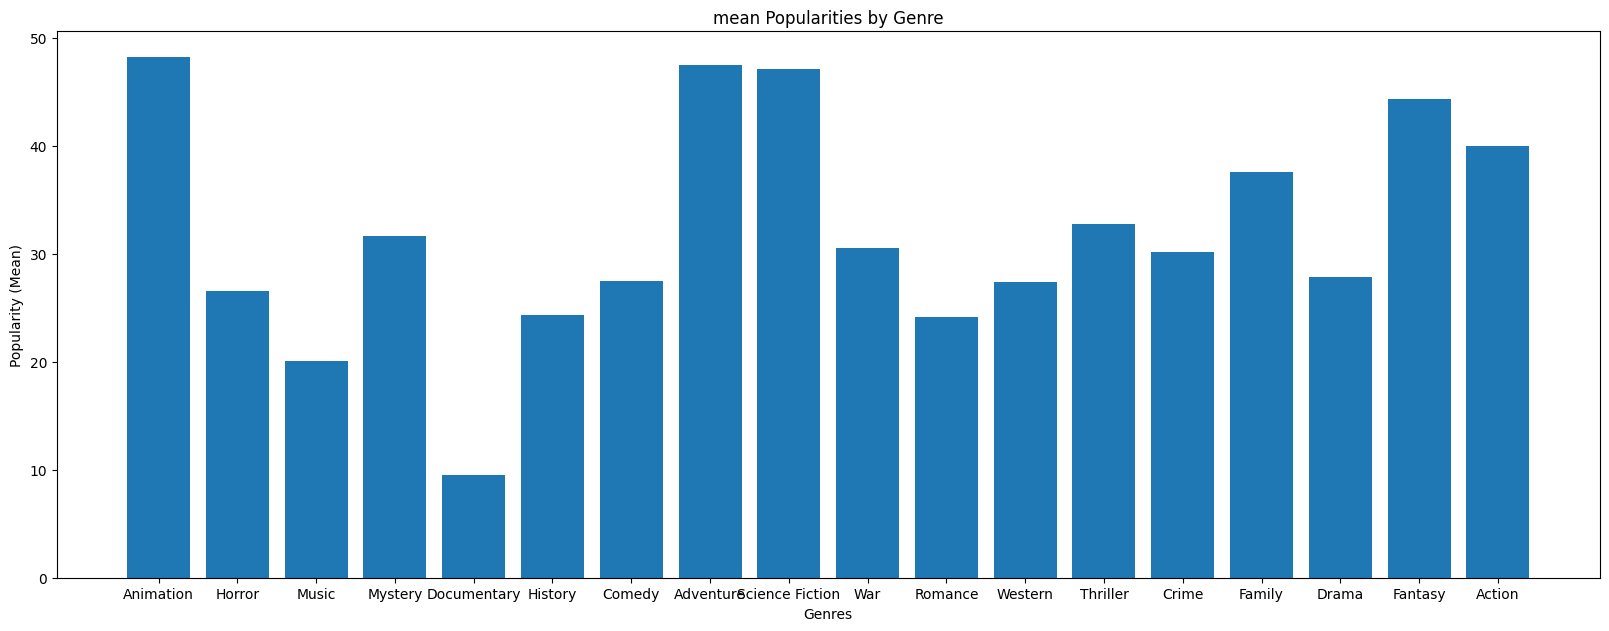

In [ ]:
pyplt.figure(figsize=(16, 6))
pyplt.bar(x=genres,height=rounded_mean_values)
pyplt.tight_layout()
pyplt.title("mean Popularities by Genre")
pyplt.ylabel("Popularity (Mean)")
pyplt.xlabel("Genres")

Via my interpretation of the question, "What are the movie genre trend shifting patterns that you can observe from the dataset?", I started by understanding what trends are which are usually the most popular object which means dictates that trend shifting would imply an object in this case our object being movie genre that is farest away from the mean and medians. To get this information, I used the dataset to find all unique genres to find the popularity means and medians for each genre. AfterwardsI used the median and means by genre to visualize the results which displays that documentaries are the movie genre that shifts the movie genre trend pattern the most since it is by far the lowest in both median and mean compared to all other moviegenres.

* <h4>What are the strongest and weakest features correlated with movie revenue? -- Wei Qi

<ipython-input-16-ddb5e9e8c00d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
<ipython-input-16-ddb5e9e8c00d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='Reds', center=0,
<ipython-input-16-ddb5e9e8c00d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  xticklabels=data.corr().columns,
<ipython-input-16-ddb5e9e8c00d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, 

                        budget        id  popularity   revenue   runtime  \
budget                1.000000  0.012717    0.427822  0.703984  0.226795   
id                    0.012717  1.000000    0.178044  0.029373 -0.033730   
popularity            0.427822  0.178044    1.000000  0.599706  0.179201   
revenue               0.703984  0.029373    0.599706  1.000000  0.231085   
runtime               0.226795 -0.033730    0.179201  0.231085  1.000000   
vote_average         -0.034135 -0.064647    0.286779  0.187030  0.382346   
vote_count            0.537224  0.106548    0.747323  0.754761  0.255873   
release_day_of_month  0.019130  0.015532    0.011399  0.032974  0.020868   
release_day_of_year   0.016935 -0.044083    0.019880  0.037649  0.159376   
year                  0.270072  0.420849    0.163061  0.148827 -0.158900   

                      vote_average  vote_count  release_day_of_month  \
budget                   -0.034135    0.537224              0.019130   
id                 

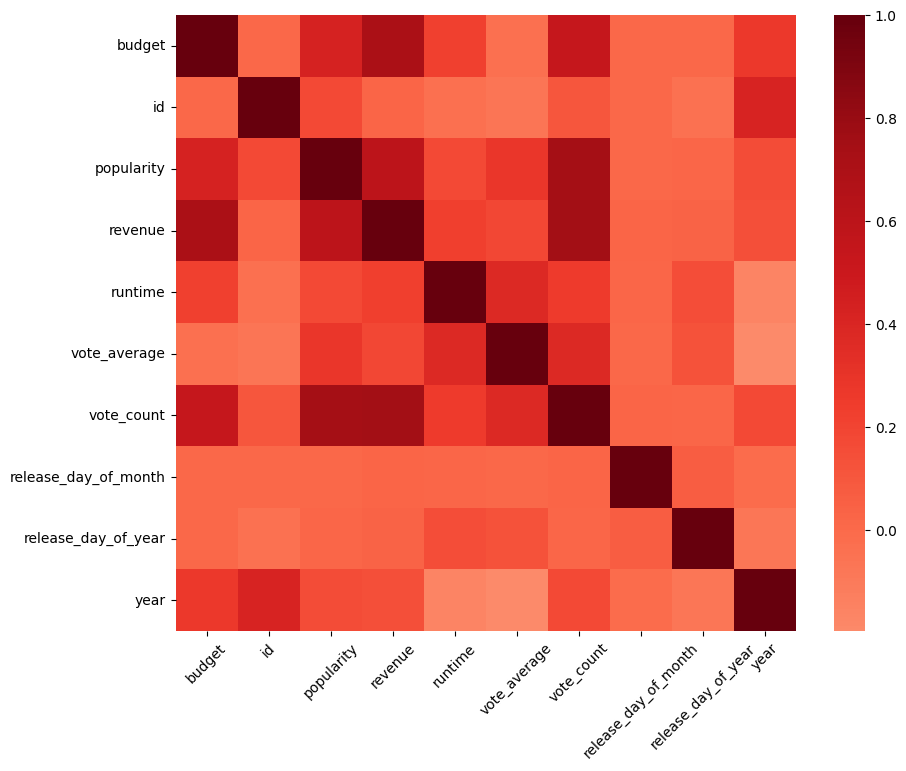

In [ ]:
print(data.corr())
pyplt.figure(figsize=(10, 8))
# Plot heatmap with red color and horizontal x-axis labels
sns.heatmap(data.corr(), cmap='Reds', center=0,
            xticklabels=data.corr().columns,
            yticklabels=data.corr().index)
# Rotate the x-axis labels for better readability
pyplt.xticks(rotation=45)
pyplt.yticks(rotation=0)
pyplt.show()


In [ ]:
groupby_day_rev = data.groupby('release_day_of_week').revenue.agg(['count', 'median'])
print(groupby_day_rev.sort_values('median'))

                     count      median
release_day_of_week                   
Saturday               129  41158757.0
Friday                1304  42185535.5
Sunday                 112  44367120.5
Monday                 157  49469904.0
Tuesday                223  68896829.0
Thursday               665  77000000.0
Wednesday              593  86658558.0


By ranking, we see budget is the most correlated with revenue, followed by popularity and vote count.
Runtime is not very strongly correlated with revenue.
Correlation with vote average is suprisingly low.
Correlation with id is, as expected, very low.

# **<h3> Modeling and Question Answering (10 points)**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import math

* <h4>Movie Revenue Prediction Model 1. -- Ronghao Zeng

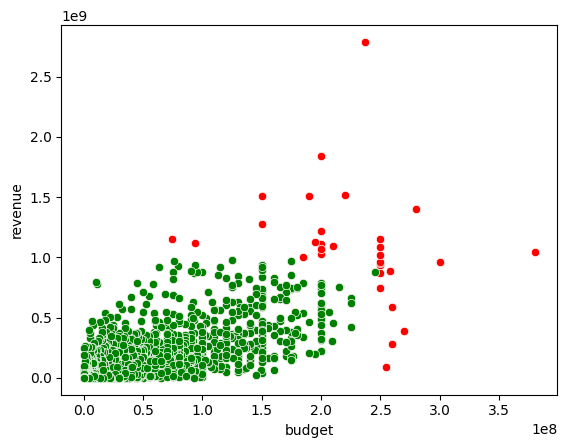

In [ ]:
# Create a scatter plot between budget and revenue to find out outliers.
sns.scatterplot(x=data["budget"], y=data["revenue"],color='red')
# Remove the outliers according to the scatter plot.
data_without_outliers = data[(data["budget"] < 250000000) & (data["revenue"] < 1000000000)]
# Create a scatter plot again, and check if there are any outliers else.
sns.scatterplot(x=data_without_outliers["budget"], y=data_without_outliers["revenue"],color='green')
pyplt.show()


<h4><center>Build model without the Cross-Validation</center></h4>

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Create a LinearRegression object
model = LinearRegression()
# Create some empty lists to store values
coef = []
intercept = []
MSE = []

# Loop 100 times to fit the model and calculate the statistics
for i in range(100):
    # Split the dataset into training set and test set
    train, test = train_test_split(data_without_outliers)
    # Fit the model to the training data
    model.fit(train["budget"].to_numpy().reshape(-1, 1), train["revenue"].to_numpy())
    # Store the value of slope (coefficient) in each loop
    coef.append(model.coef_[0])
    # Store the value of intercept in the model of each loop
    intercept.append(model.intercept_)
    # Calculate predicted values by the values of budget for each movie
    predictions = model.predict(test["budget"].to_numpy().reshape(-1, 1))
    # Store the value of mean squared error in the model of each loop
    MSE.append(np.mean((test["revenue"] - predictions) ** 2))

# Calculate the average value of slope (coefficient) and intercept across all loops
avg_coef = np.mean(coef)
avg_intercept = np.mean(intercept)

# Create the final model with the average slope and intercept
final_model = LinearRegression()
final_model.coef_ = np.array([avg_coef])
final_model.intercept_ = avg_intercept

# Print the final linear regression model
print(f"The final linear model is: Revenue = {final_model.coef_[0]} * Budget + {final_model.intercept_}")

# Calculate the average of each linear regression model's MSE in the loop.
MSE_average = np.mean(MSE)
# Print out the average.
print("Average MSE:", MSE_average)
# Calculate RMSE.
RMSE = np.sqrt(MSE_average)
# Print out the RMSE.
print("RMSE:", RMSE)


The final linear model is: Revenue = 2.576966862157053 * Budget + 11942231.187793946
Average MSE: 1.2831217096728168e+16
RMSE: 113274962.35588944


Here we use standard linear regression. With some outliers removed, RMSE comes out to be 113 million USD, a 32 precent improvement from guessing median only.

The equation is roughly  Revenue = 2.57 * Budget + 12 million

Without removing the outliers, we get a RSME 114 million.

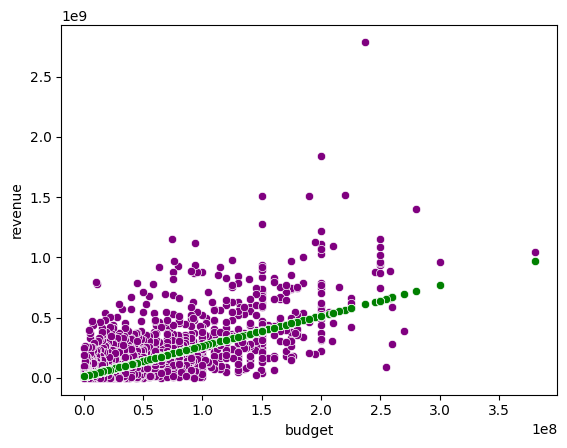

In [ ]:
# # # By the model, calculate the predicted values of revenue.

# # Use the model to make revenue predictions based on budget
# budget_data = data["budget"].to_numpy().reshape(-1, 1)
# revenue_predictions = model_1.predict(budget_data)

# # Create a scatter plot between budget and revenue.
# sns.scatterplot(x="budget", y="revenue", data=data, color='purple')

# # Create a scatter plot between budget and predictions.
# sns.scatterplot(x="budget", y=predictions, data=data, color='green')

# Use the model to make revenue predictions based on budget
budget_data = data["budget"].to_numpy().reshape(-1, 1)
revenue_predictions = model.predict(budget_data)

# Create a scatter plot between budget and revenue.
sns.scatterplot(x="budget", y="revenue", data=data, color='purple')

# Create a scatter plot between budget and predictions.
sns.scatterplot(x="budget", y=revenue_predictions.flatten(), data=data, color='green')

pyplt.show()

<h4><center>Build model with the Cross-Validation</center></h4>

In [ ]:
import matplotlib.pyplot as pyplt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np

# Create a LinearRegression object.
model_1 = LinearRegression()

# Create empty lists to store values.
coef = []
intercept = []
MSE = []

# Create a KFold object to separate the data into the Cross-Validation set.
kf = KFold(n_splits=10, shuffle=True)

# Loop through to perform Cross-Validation.
for train_index, test_index in kf.split(data_without_outliers):
    # Get the training set.
    train = data_without_outliers.iloc[train_index]
    # Get the testing set.
    test = data_without_outliers.iloc[test_index]
    # Fit the training set to the model.
    model_1 = model_1.fit(train["budget"].to_numpy().reshape(-1, 1), train["revenue"].to_numpy())
    # Store the slope (coefficient) value of each loop.
    coef.append(model_1.coef_[0])
    # Store the intercept value of each loop.
    intercept.append(model_1.intercept_)
    # Calculate predicted values based on the budget values for each movie.
    predictions = model_1.predict(test["budget"].to_numpy().reshape(-1, 1))
    # Store the mean square error value of each loop.
    MSE.append(np.mean((test["revenue"] - predictions) ** 2))

# Use the average of the slope (coefficient) values as the slope of the final model.
model_1.coef_ = np.array([np.mean(coef)])
# Use the average of the intercept values as the intercept of the final model.
model_1.intercept_ = np.mean(intercept)

# Print the final linear regression model.
print("The final linear model is: Revenue = " + str(model_1.coef_[0]) + " * Budget + " + str(model_1.intercept_))



The final linear model is: Revenue = 2.571578684602803 * Budget + 12117530.037541557


In [ ]:
# Calculate the average of each linear regression model's MSE in the loop.
MSE_average = np.mean(MSE)
# Print out the average.
print("Average MSE:", MSE_average)
# Calculate RMSE.
RMSE = np.sqrt(MSE_average)
# Print out the RMSE.
print("RMSE:", RMSE)

Average MSE: 1.2924793590719046e+16
RMSE: 113687262.21841674


<Axes: xlabel='budget', ylabel='revenue'>

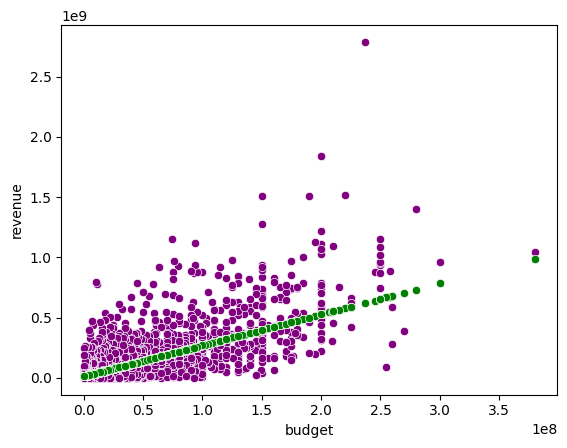

In [ ]:
# Using the model, generate predicted revenue values.
predictions = model_1.predict(data["budget"].to_numpy().reshape(-1, 1))
# Plot a scatter graph of budget against revenue.
sns.scatterplot(x= data["budget"], y= data["revenue"],color='purple')
# Plot a scatter graph of budget against predicted revenue values.
sns.scatterplot(x= data["budget"], y= predictions, color='green')

We observe the highest correlation coefficient between budget and revenue from the table and heat map, indicating the need to build a linear regression model between them.

To train the model, we first split the dataset into a training set and a test set. We use the fit function to generate a suitable linear regression model, but notice that the value of MSE varies each time we generate a linear regression due to extreme cases affecting our model. To account for this, we repeat the fitting process a hundred times, recording the coefficient (slope) and intercept values. We take the mean of these values as our final model. To evaluate its performance, we calculate the MSE of the test set each time we generate the linear regression model and record the values. We then take the mean of these values to get the Mean Square Error of the final model.

However, after evaluating the performance of the final model, we find that its MSE is very high, indicating that its predictions are not accurate. We wonder if using Cross-Validation can improve the accuracy of the model, but unfortunately, we do not see an obvious decrease in MSE after applying it.

Therefore, we conclude that the final model cannot provide accurate predictions, and we suspect that this is because we have not included other features, such as genres and production companies, in the model. We believe these variables may also have significant roles in predicting movies' revenue.

* <h4>Movie Revenue Prediction Model 2 -- Wei Qi

<h4><center>Baseline Model - Guessing the mean of ''training set''</center></h4>
If we do this, then our avg RMSE will be, in essence, the standard deviation of the revenue, which is 187 million USD.
Although out of order, we also calculated the RMSE if we guess the median, which is shown a few lines below, rather than the mean. It was using a somewhat unconventional coding style. The RMSE for median came out to be 158 million USD

<h4><center>Code for RMSE for predicting median</center></h4>

In [ ]:
# BASELINE MODEL - MEDIAN
basem1 = LinearRegression()
# Create some empty lists to store values.
coef = []
intercept = []
MSE = []
# Create a loop.
times = 0
while (times <= 100):
    MSE.append(np.mean((test["revenue"]
                        - np.median(data_without_outliers['revenue'])) ** 2))
    times = times + 1
# Use the average of the value of slope (coefficient) as the slope of the final model.
basem1.coef_ = 0
# Use the average of the value of intercept as the intercept of the final model.
basem1.intercept_ = np.median(data_without_outliers['revenue'])
# Print the final linear regression model.
print("predicting median every time is: Revenue = " + str(np.median(data_without_outliers['revenue'])) )

predicting median every time is: Revenue = 55707411.0


In [ ]:
# Calculate the average of each linear regression model's MSE in the loop.
MSE_average = np.mean(MSE)
# Print out the average.
print("Average MSE, for basem1:", MSE_average)
print("Average RMSE:", MSE_average ** 0.5 / 1000000, 'million')

Average MSE, for basem1: 2.2049618086874296e+16
Average RMSE: 148.49113807522082 million


<Axes: xlabel='budget', ylabel='revenue'>

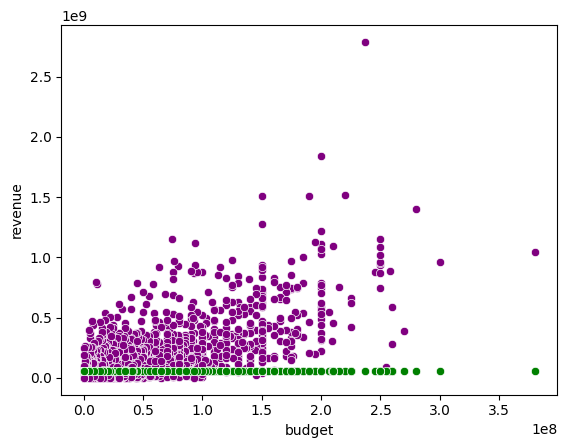

In [ ]:
# Create a scatter plot between budget and revenue.
sns.scatterplot(x=data["budget"], y=data["revenue"],color='purple')
# Create a scatter plot between budget and predictions.
sns.scatterplot(x=data["budget"], y=np.median(data_without_outliers['revenue']),color='green')

<h4><center>Advanced Model - Applying a non-linear function to budget</center></h4>
Here we try training by applying a non-linear function to budget, to see if we can obtain a better model. For simplicity, we have called all the non-linear transformations 'budgetSquared'
We used the original dataset, without removing outliers. First off, is an identity transformation, so same as the standard linear regression, except without removing any outliers. RMSE: 132.77 million USD

After trying several functions, including squared, cubed, square root... The best one came out to be raising budget to the 1.25th power. That resulted in a RMSD of 129 million USD, not a big improvement from 132 million, not enough to pass Occam's Razor's test.

<ipython-input-28-f9d7068c2bb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["budgetSquared"] = data["budget"]


The final linear model is: Revenue = 2.966188318149075 * BudgetSquared + 956463.0227412046
Average MSE: 1.7713869774677968e+16
Average RMSE: 133.09346255424407 million


<Axes: xlabel='budget', ylabel='revenue'>

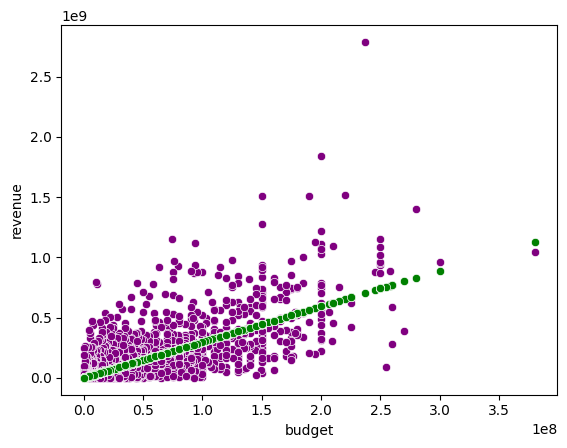

In [ ]:
data["budgetSquared"] = data["budget"]
# Create a LinearRegression obeject.
model_2 = LinearRegression()
# Create some empty lists to store values.
coef = []
intercept = []
MSE = []
# Create a loop.
times = 0
while (times <= 100):
    # Seperate the dataset to training set and test set.
    train, test = train_test_split(data)
    # Fit the dataset to the model.
    model_2 = model_2.fit(train["budgetSquared"].to_numpy().reshape(-1, 1), train["revenue"].to_numpy())
    # Store the value of slope (coefficient) in each loop.
    coef.append(model_2.coef_[0])
    # Store the value of intercept in the model of each loop.
    intercept.append(model_2.intercept_)
    # Calculate predicted values by the values of budget for each movie.
    predictions = model_2.predict(test["budgetSquared"].to_numpy().reshape(-1, 1))
    # Store the value of mean square value in the model of each loop.
    MSE.append(np.mean((test["revenue"] - predictions) ** 2))
    times = times + 1
# Use the average of the value of slope (coefficient) as the slope of the fianl model.
model_2.coef_ = np.array([np.mean(coef)])
# Use the average of the value of intercept as the intercept of the fianl model.
model_2.intercept_ = np.mean(intercept)
# # By the model, calculate the predicted values of revenue.
predictions = model_2.predict(data["budgetSquared"].to_numpy().reshape(-1, 1))
# Print the final linear regression model.
print("The final linear model is: Revenue = " + str(model_2.coef_[0]) + " * BudgetSquared + " + str(model_2.intercept_))
# Calculate the average of each linear regression model's MSE in the loop.
MSE_average = np.mean(MSE)
# Print out the average.
print("Average MSE:", MSE_average)
print("Average RMSE:", MSE_average ** 0.5 / 1000000, 'million')
sns.scatterplot(x= data["budget"], y=data["revenue"],color="purple")
sns.scatterplot(x=data["budget"], y=predictions,color="green")

<ipython-input-29-bb09ae2cc9c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["budgetSquared"] = data["budget"] ** 1.25


The final linear model is: Revenue = 0.025830813437352558 * BudgetSquared + 25009683.75498818
Average MSE: 1.7362747242356176e+16
Average RMSE: 131.76777770895347 million


<Axes: xlabel='budget', ylabel='revenue'>

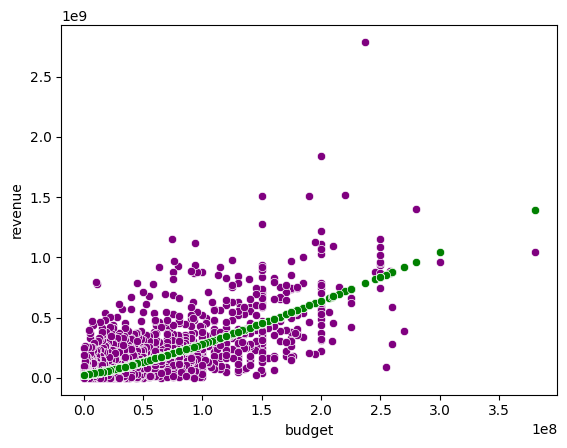

In [ ]:
data["budgetSquared"] = data["budget"] ** 1.25
# Create a LinearRegression obeject.
model_2 = LinearRegression()
# Create some empty lists to store values.
coef = []
intercept = []
MSE = []
# Create a loop.
times = 0
while (times <= 100):
    # Seperate the dataset to training set and test set.
    train, test = train_test_split(data)
    # Fit the dataset to the model.
    model_2 = model_2.fit(train["budgetSquared"].to_numpy().reshape(-1, 1), train["revenue"].to_numpy())
    # Store the value of slope (coefficient) in each loop.
    coef.append(model_2.coef_[0])
    # Store the value of intercept in the model of each loop.
    intercept.append(model_2.intercept_)
    # Calculate predicted values by the values of budget for each movie.
    predictions = model_2.predict(test["budgetSquared"].to_numpy().reshape(-1, 1))
    # Store the value of mean square value in the model of each loop.
    MSE.append(np.mean((test["revenue"] - predictions) ** 2))
    times = times + 1
# Use the average of the value of slope (coefficient) as the slope of the fianl model.
model_2.coef_ = np.array([np.mean(coef)])
# Use the average of the value of intercept as the intercept of the fianl model.
model_2.intercept_ = np.mean(intercept)
# By the model, calculate the predicted values of revenue.
predictions = model_2.predict(data["budgetSquared"].to_numpy().reshape(-1, 1))
# Print the final linear regression model.
print("The final linear model is: Revenue = " + str(model_2.coef_[0]) + " * BudgetSquared + " + str(model_2.intercept_))
# Calculate the average of each linear regression model's MSE in the loop.
MSE_average = np.mean(MSE)
# Print out the average.
print("Average MSE:", MSE_average)
print("Average RMSE:", MSE_average ** 0.5 / 1000000, 'million')
sns.scatterplot(x=data["budget"], y=data["revenue"],color="purple")
sns.scatterplot(x=data["budget"], y=predictions,color="green")

<h4><center>Advanced model - classifying by budget, then applying linear regression</center></h4>
We created three budget classes, namely under 15 million USD, 15 million - 105 million USD, and Over 105 million USD, which we labeled as data1, data2, and data3, respectively. Next, we applied standard linear regression to these three classes and compared them to the original model 1. It turned out that model 1 was nearly identical to the results of training data1 and data2 separately. However, for model 3, the RMSE was 312 million for Model 1, while training on data3 alone gave an RMSE of 292 million, resulting in a 6.4 percent improvement. This improvement may still not be enough to pass the Occam's Razor Test.

In [ ]:
data1 = data[(data["budget"] < 15000000)]
data2 = data[(data["budget"] > 15000000) & (data["budget"] < 105000000)]
data3 = data[(data["budget"] > 105000000)]
# data4 = data[(data["budget"] > 200000000)]
# data1.describe()
#data2.describe()
# data3.describe()
# data4.describe()
# pyplt.hist(data1.budget, bins=10)
# pyplt.hist(data2.budget, bins=10)
# pyplt.hist(data3.budget, bins=10)
# pyplt.hist(data4.budget, bins=10)

The final linear model is: Revenue = 3.2113756557045288 * Budget + 16539211.690043664
Average MSE: 4122269000452914.0
Average RMSE: 64.20489857053676 million
Model 1 RMSE: 64.5022647018798 million


<ipython-input-31-c4ed26b9498e>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["predictions"] = model_31.predict(data1["budget"].to_numpy().reshape(-1, 1))


<Axes: xlabel='budget', ylabel='revenue'>

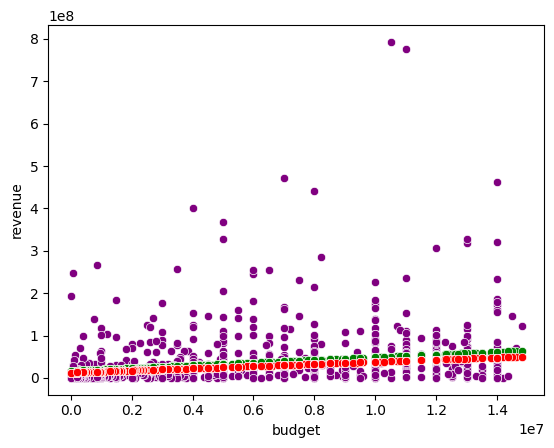

In [ ]:
# Create a LinearRegression obeject.
model_31 = LinearRegression()
# Create some empty lists to store values.
coef = []
intercept = []
MSE = []
# Create a loop.
times = 0
while (times <= 100):
    # Seperate the dataset to training set and test set.
    train, test = train_test_split(data1)
    # Fit the dataset to the model.
    model_31 = model_31.fit(train["budget"].to_numpy().reshape(-1, 1), train["revenue"].to_numpy())
    # Store the value of slope (coefficient) in each loop.
    coef.append(model_31.coef_[0])
    # Store the value of intercept in the model of each loop.
    intercept.append(model_31.intercept_)
    # Calculate predicted values by the values of budget for each movie.
    predictions = model_31.predict(test["budget"].to_numpy().reshape(-1, 1))
    # Store the value of mean square value in the model of each loop.
    MSE.append(np.mean((test["revenue"] - predictions) ** 2))
    times = times + 1
# Use the average of the value of slope (coefficient) as the slope of the fianl model.
model_31.coef_ = np.array([np.mean(coef)])
# Use the average of the value of intercept as the intercept of the fianl model.
model_31.intercept_ = np.mean(intercept)
# Print the final linear regression model.
print("The final linear model is: Revenue = " + str(model_31.coef_[0]) + " * Budget + " + str(model_31.intercept_))
# Calculate the average of each linear regression model's MSE in the loop.
MSE_average = np.mean(MSE)
# Print out the average.
data1["predictions"] = model_31.predict(data1["budget"].to_numpy().reshape(-1, 1))
print("Average MSE:", MSE_average)
print("Average RMSE:", MSE_average ** 0.5 / 1000000, 'million')
model1mse = (data1['revenue'] - (data1["budget"] * 2.5666456407290505 + 12245913.01169521)) ** 2
print("Model 1 RMSE:", np.mean(model1mse) ** 0.5 / 1000000, 'million')
sns.scatterplot(x=data1["budget"], y=data1["revenue"],color="purple")
sns.scatterplot(x=data1["budget"], y=data1["predictions"],color="green")
sns.scatterplot(x=data1["budget"], y=data1["budget"] * 2.5666456407290505 + 12245913.01169521, color='red')

The final linear model is: Revenue = 2.3913303978555382 * Budget + 12206494.173643533
Average MSE: 1.405347558212979e+16
Average RMSE: 118.5473558630887 million
Model 1 RMSE: 119.67720459015753 million


<ipython-input-32-6159ba94ffd6>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["predictions"] = model_32.predict(data2["budget"].to_numpy().reshape(-1, 1))


<Axes: xlabel='budget', ylabel='revenue'>

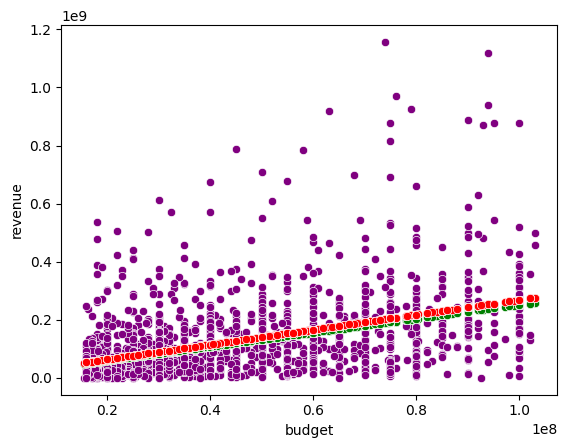

In [ ]:
# Create a LinearRegression obeject.
model_32 = LinearRegression()
# Create some empty lists to store values.
coef = []
intercept = []
MSE = []
# Create a loop.
times = 0
while (times <= 100):
    # Seperate the dataset to training set and test set.
    train, test = train_test_split(data2)
    # Fit the dataset to the model.
    model_32 = model_32.fit(train["budget"].to_numpy().reshape(-1, 1), train["revenue"].to_numpy())
    # Store the value of slope (coefficient) in each loop.
    coef.append(model_32.coef_[0])
    # Store the value of intercept in the model of each loop.
    intercept.append(model_32.intercept_)
    # Calculate predicted values by the values of budget for each movie.
    predictions = model_32.predict(test["budget"].to_numpy().reshape(-1, 1))
    # Store the value of mean square value in the model of each loop.
    MSE.append(np.mean((test["revenue"] - predictions) ** 2))
    times = times + 1
# Use the average of the value of slope (coefficient) as the slope of the fianl model.
model_32.coef_ = np.array([np.mean(coef)])
# Use the average of the value of intercept as the intercept of the fianl model.
model_32.intercept_ = np.mean(intercept)
# Print the final linear regression model.
print("The final linear model is: Revenue = " + str(model_32.coef_[0]) + " * Budget + " + str(model_32.intercept_))
# Calculate the average of each linear regression model's MSE in the loop.
MSE_average = np.mean(MSE)
# Print out the average.
data2["predictions"] = model_32.predict(data2["budget"].to_numpy().reshape(-1, 1))
print("Average MSE:", MSE_average)
print("Average RMSE:", MSE_average ** 0.5 / 1000000, 'million')
model1mse = (data2['revenue'] - (data2["budget"] * 2.5666456407290505 + 12245913.01169521)) ** 2
print("Model 1 RMSE:", np.mean(model1mse) ** 0.5 / 1000000, 'million')
sns.scatterplot(x=data2["budget"], y=data2["revenue"],color="purple")
sns.scatterplot(x=data2["budget"], y=data2["predictions"],color="green")
sns.scatterplot(x=data2["budget"], y=data2["budget"] * 2.5666456407290505 + 12245913.01169521, color='Red')

The final linear model is: Revenue = 3.9239845797519926 * Budget + -121323430.92578328
Average MSE: 8.94444072295448e+16
Average RMSE: 299.0725785316079 million
Model 1 RMSE: 312.82331489501604 million


<ipython-input-33-49c4ab280efc>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["predictions"] = model_33.predict(data3["budget"].to_numpy().reshape(-1, 1))


<Axes: xlabel='budget', ylabel='revenue'>

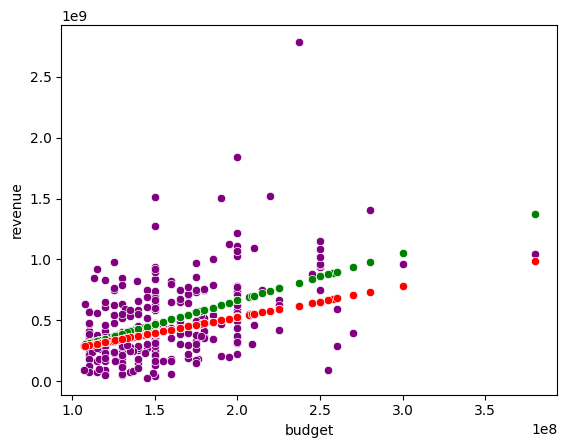

In [ ]:
# Create a LinearRegression obeject.
model_33 = LinearRegression()
# Create some empty lists to store values.
coef = []
intercept = []
MSE = []
# Create a loop.
times = 0
while (times <= 100):
    # Seperate the dataset to training set and test set.
    train, test = train_test_split(data3)
    # Fit the dataset to the model.
    model_33 = model_33.fit(train["budget"].to_numpy().reshape(-1, 1), train["revenue"].to_numpy())
    # Store the value of slope (coefficient) in each loop.
    coef.append(model_33.coef_[0])
    # Store the value of intercept in the model of each loop.
    intercept.append(model_33.intercept_)
    # Calculate predicted values by the values of budget for each movie.
    predictions = model_33.predict(test["budget"].to_numpy().reshape(-1, 1))
    # Store the value of mean square value in the model of each loop.
    MSE.append(np.mean((test["revenue"] - predictions) ** 2))
    times = times + 1
# Use the average of the value of slope (coefficient) as the slope of the fianl model.
model_33.coef_ = np.array([np.mean(coef)])
# Use the average of the value of intercept as the intercept of the fianl model.
model_33.intercept_ = np.mean(intercept)
# Print the final linear regression model.
print("The final linear model is: Revenue = " + str(model_33.coef_[0]) + " * Budget + " + str(model_33.intercept_))
# Calculate the average of each linear regression model's MSE in the loop.
MSE_average = np.mean(MSE)
# Print out the average.
data3["predictions"] = model_33.predict(data3["budget"].to_numpy().reshape(-1, 1))
print("Average MSE:", MSE_average)
print("Average RMSE:", MSE_average ** 0.5 / 1000000, 'million')
model1mse = (data3['revenue'] - (data3["budget"] * 2.5666456407290505 + 12245913.01169521)) ** 2
print("Model 1 RMSE:", np.mean(model1mse) ** 0.5 / 1000000, 'million')
sns.scatterplot(x=data3["budget"], y=data3["revenue"],color="purple")
sns.scatterplot(x=data3["budget"], y=data3["predictions"], color = 'Green')
sns.scatterplot(x=data3["budget"], y=data3["budget"] * 2.5666456407290505 + 12245913.01169521, color='Red')
# The final linear model is: Revenue = 2.5666456407290505 * Budget + 12245913.01169521

* <h4>Movie Revenue Prediction Model 3 -- Scott Zheng


<h4><center>Groupy by Genre prediction of Revenue</center></h4>

In [ ]:
# Create a dictionary of empty lists for each genre
allX = {genre: [] for genre in distinct_genres}
allY = {genre: [] for genre in distinct_genres}

# Iterate over each row in data
for index, row in data.iterrows():
    # Check if the row has a genre and revenue value
    if row["genres"] and row["revenue"]:
        genres = row["genres"]
        budget = row["budget"]
        revenue = row["revenue"]

        # Iterate over each genre in the row
        for genre in genres:
            # Append budget and revenue to the corresponding genre list
            if genre in allX:
                allX[genre].append(budget)
                allY[genre].append(revenue)

# Remove empty genres from allX and allY
allX = {k: v for k, v in allX.items() if v}
allY = {k: v for k, v in allY.items() if v}

We sort all values of budgets (X) and revenue (Y) into two dictionaries with key values of the specific genre, and the values of budget or revenue as lists depending on the dictionary. During this process, repeats of the same movie occur since most movies have more than a single genre. Additionally, using these lists would enable us to plot the scatter plot more accurately in the future. After the first run, we realized that the points and the line's visualization did not provide a good understanding of approximation. Therefore, we applied Napier Logarithms to obtain a better visualization of data. This is why we used log budget and revenue.

Here, we make sure that all genres have budgets and revenues by discarding the entire genre since an empty list of budget and revenues would result in an empty scatter plot.

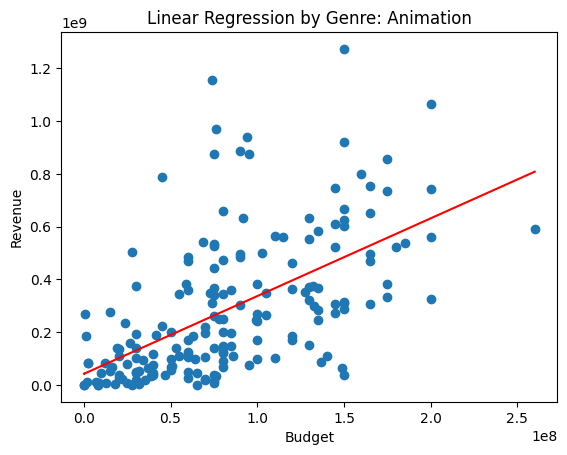

The Animation movie linear regression model is: Revenue = 2.9487198498625244 * Budget + 41992581.76025388
Average MSE: 4.680313861853836e+16
Average RMSE: 216.34033054088266 million



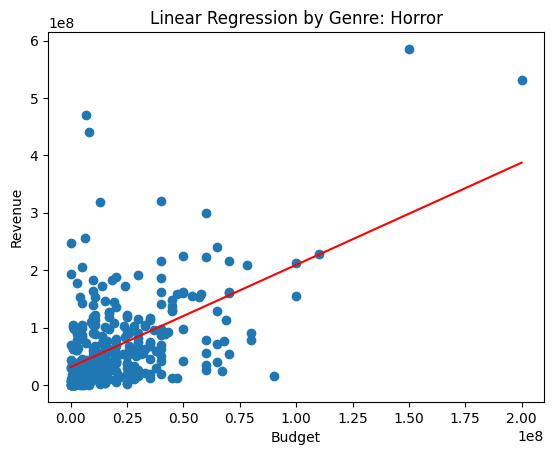

The Horror movie linear regression model is: Revenue = 1.7804753189448084 * Budget + 31124868.53507649
Average MSE: 4374270456648022.5
Average RMSE: 66.13826771732099 million



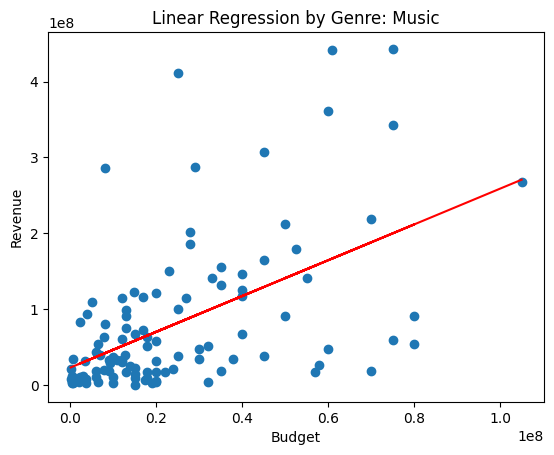

The Music movie linear regression model is: Revenue = 2.3617037538296004 * Budget + 22700220.885413624
Average MSE: 6849597800285821.0
Average RMSE: 82.76229697323427 million



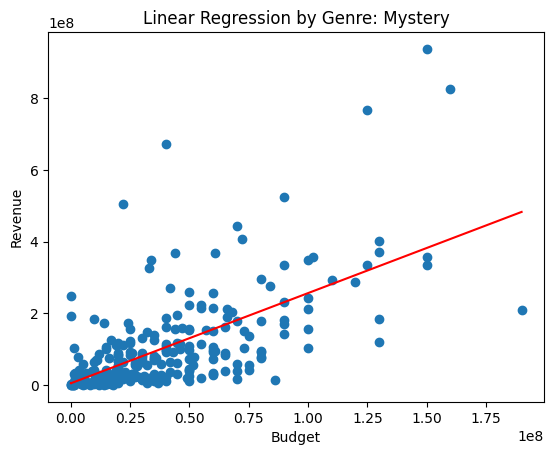

The Mystery movie linear regression model is: Revenue = 2.519306168790693 * Budget + 4411024.295410112
Average MSE: 1.0490814631808974e+16
Average RMSE: 102.42467784576613 million



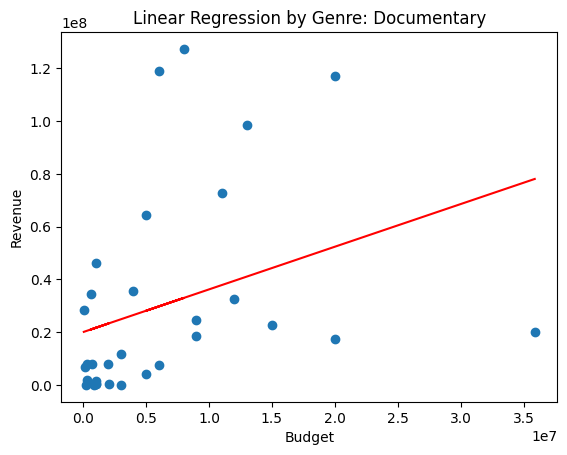

The Documentary movie linear regression model is: Revenue = 1.6187658077141251 * Budget + 20041881.21471802
Average MSE: 1257193674002705.2
Average RMSE: 35.456927024245985 million



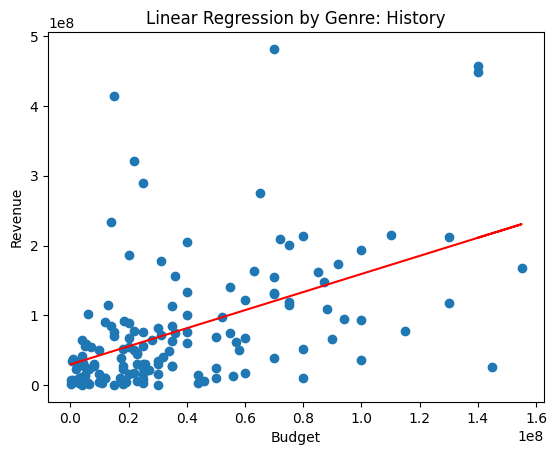

The History movie linear regression model is: Revenue = 1.2972629799899935 * Budget + 29493517.538075164
Average MSE: 6341715847183339.0
Average RMSE: 79.63489089076056 million



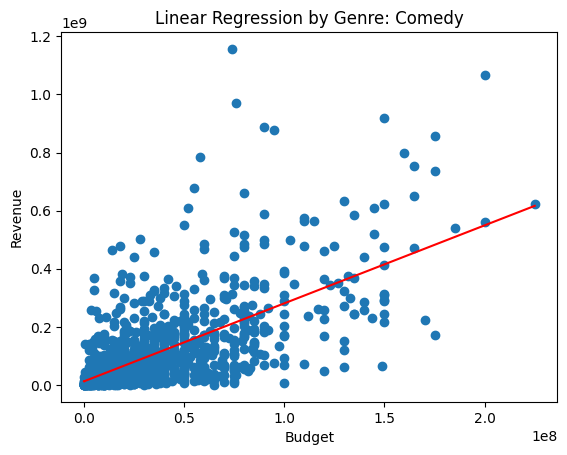

The Comedy movie linear regression model is: Revenue = 2.6861012479122066 * Budget + 12150777.141615123
Average MSE: 1.2177859090632354e+16
Average RMSE: 110.35333746938673 million



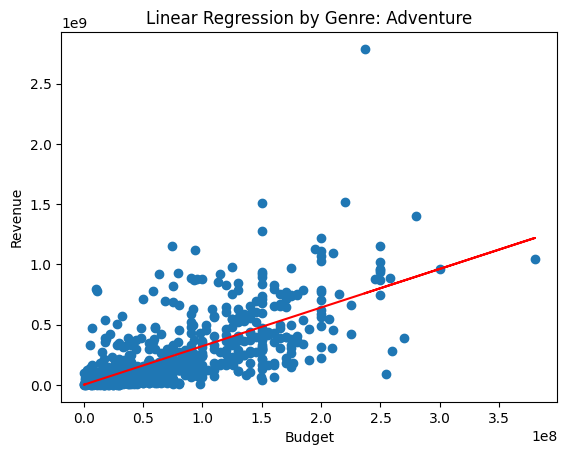

The Adventure movie linear regression model is: Revenue = 3.2042013079583196 * Budget + 1572896.2924737632
Average MSE: 4.695426136404356e+16
Average RMSE: 216.6893199122734 million



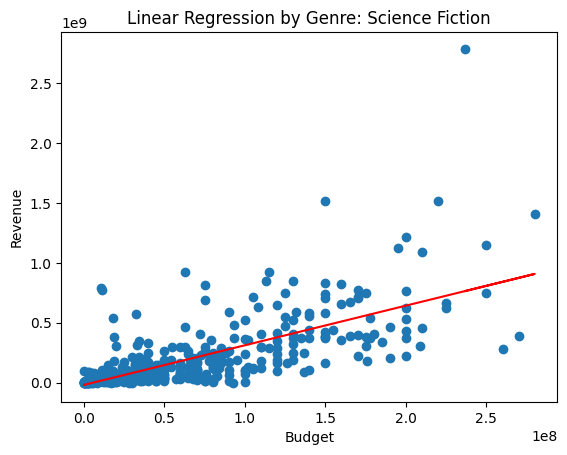

The Science Fiction movie linear regression model is: Revenue = 3.3122582814499464 * Budget + -19151237.014399678
Average MSE: 3.976294413173977e+16
Average RMSE: 199.40647966337445 million



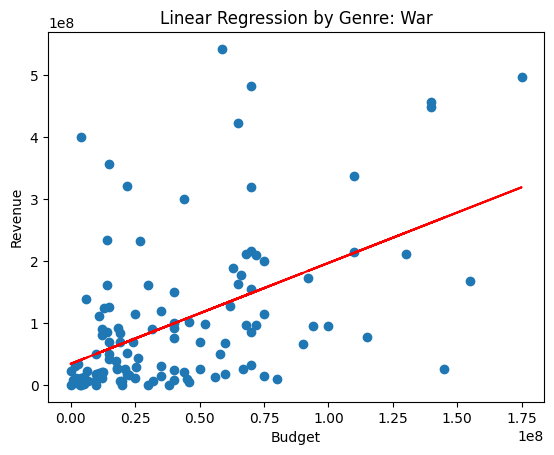

The War movie linear regression model is: Revenue = 1.6281080554557106 * Budget + 34051429.56582704
Average MSE: 1.1173925786048632e+16
Average RMSE: 105.70679157957937 million



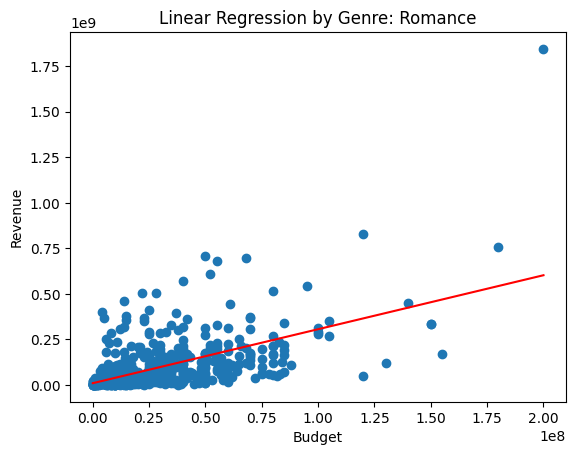

The Romance movie linear regression model is: Revenue = 2.9652051820097323 * Budget + 9305017.088441968
Average MSE: 1.3284900532755022e+16
Average RMSE: 115.26014286280848 million



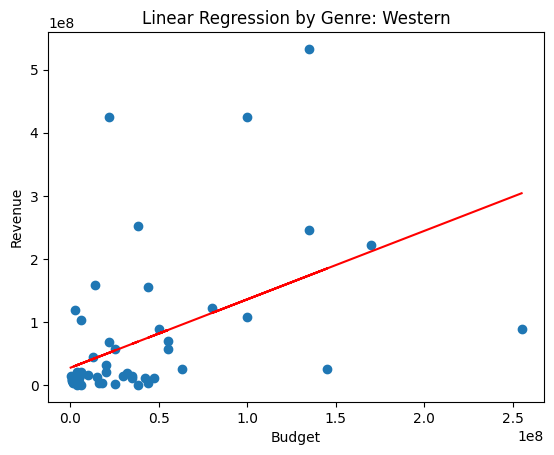

The Western movie linear regression model is: Revenue = 1.0853490361449334 * Budget + 27262483.377312288
Average MSE: 9650767968598368.0
Average RMSE: 98.23832230142354 million



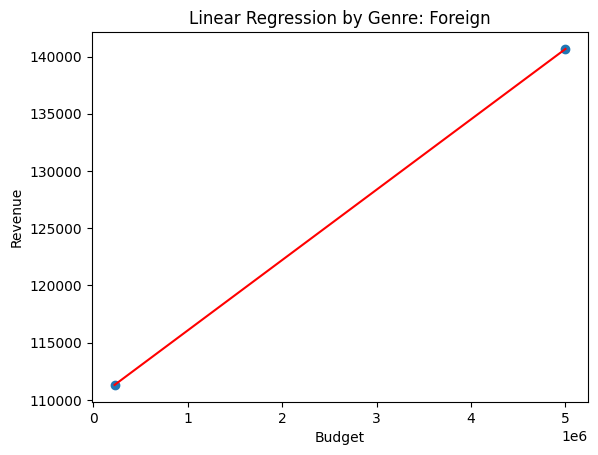

The Foreign movie linear regression model is: Revenue = 0.006149947643979058 * Budget + 109916.26178010472
Average MSE: 0.0
Average RMSE: 0.0 million



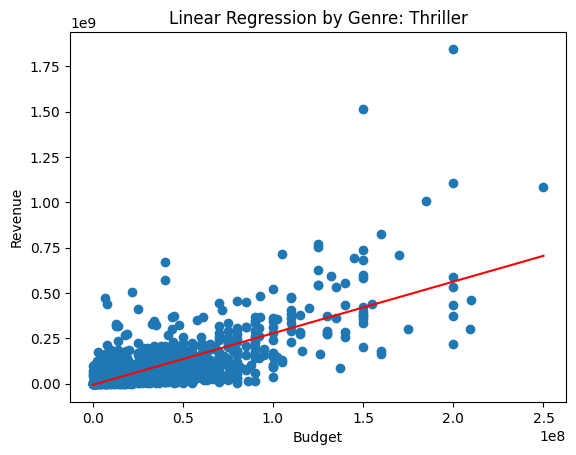

The Thriller movie linear regression model is: Revenue = 2.8454100167481426 * Budget + -6307214.417639196
Average MSE: 1.269691805971606e+16
Average RMSE: 112.68060196731317 million



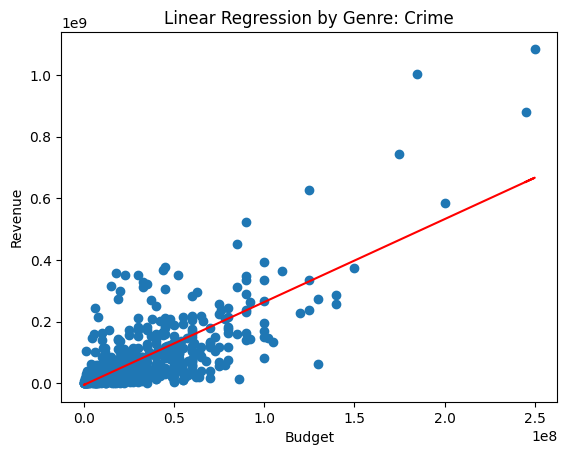

The Crime movie linear regression model is: Revenue = 2.6899400238719537 * Budget + -5596699.301760897
Average MSE: 6660520061256486.0
Average RMSE: 81.61200929554721 million



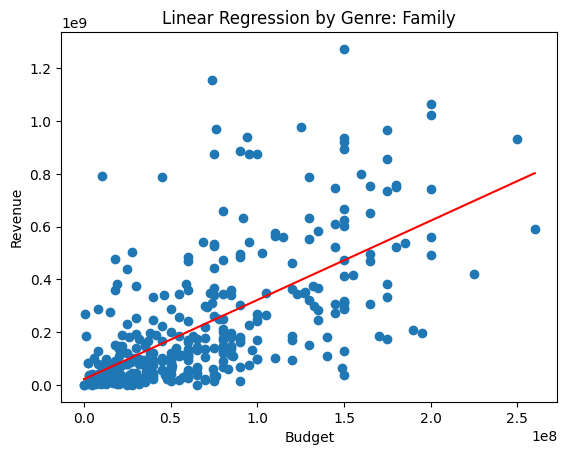

The Family movie linear regression model is: Revenue = 3.006908549749524 * Budget + 21357490.378148407
Average MSE: 3.718023147011442e+16
Average RMSE: 192.82176088324266 million



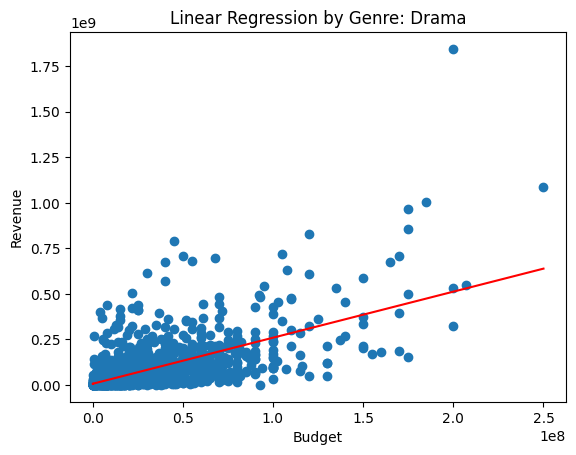

The Drama movie linear regression model is: Revenue = 2.529373448990065 * Budget + 6236309.315557182
Average MSE: 1.0145336157072372e+16
Average RMSE: 100.72405947474701 million



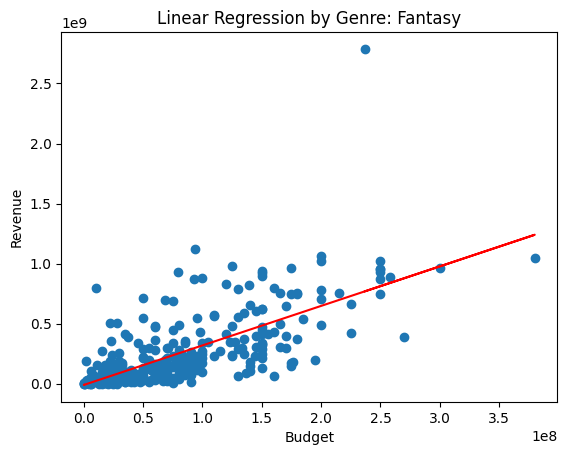

The Fantasy movie linear regression model is: Revenue = 3.290849599323764 * Budget + -10413253.651506722
Average MSE: 4.508023341354684e+16
Average RMSE: 212.32106210535693 million



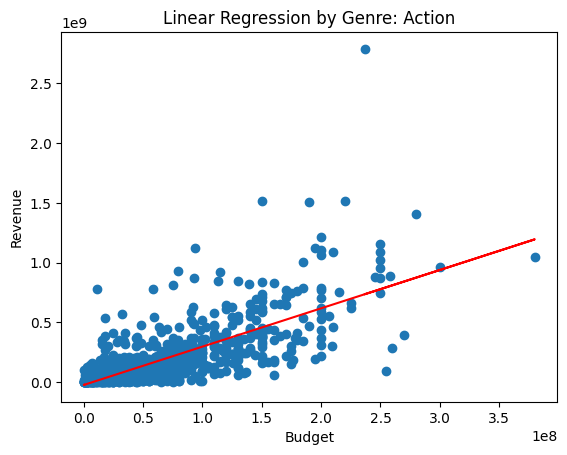

The Action movie linear regression model is: Revenue = 3.2051038291537703 * Budget + -23112306.722066283
Average MSE: 2.8389161715514416e+16
Average RMSE: 168.4908357018696 million



In [ ]:
for genre in distinct_genres:
    if allX.get(genre) and allY.get(genre):
        # Get x and y data for the current genre
        x = allX[genre]
        y = allY[genre]

        # Create and fit the linear regression model
        model = LinearRegression().fit(np.array(x).reshape(-1, 1), y)
        coef = model.coef_[0]
        intercept = model.intercept_

        # Create predictions based on the model and calculate MSE and RMSE
        predictions = model.predict(np.array(x).reshape(-1, 1))
        mse = np.mean((y - predictions) ** 2)
        rmse = mse ** 0.5 / 1000000

        # Plot the regression line and scatter plot
        pyplt.scatter(x, y)
        pyplt.plot(x, model.predict(np.array(x).reshape(-1, 1)), color="red")
        pyplt.xlabel("Budget")
        pyplt.ylabel("Revenue")
        pyplt.title("Linear Regression by Genre: " + genre)
        pyplt.show()

        # Print the model equation, MSE, and RMSE
        print("The " + genre + " movie linear regression model is: Revenue = " + str(coef) + " * Budget + " + str(intercept))
        print("Average MSE:", mse)
        print("Average RMSE:", rmse, "million\n")


We loop through all key values of both dictionaries to plot the scatterplot, label both axes, and name the plot since we have so many genres. We also use the loop to calculate the MSE and the RMSE to visualize the accuracy of the models. The above data demonstrates that all MSE are large numbers, many of which are to 10 to the 16th power. Similarly, the RMSE is also a large number, which is no surprise since the RMSE is derived from the MSE. We can determine from this information and the information from other models that the MSE and RMSE are mediocre to poor. To improve this, we can remove all outliers, so the difference between predicted and actual values is less drastic, resulting in smaller MSE and RMSE. This result is an example of a linear regression algorithm that sorts the data into categories to achieve a better idea of what the revenue would be like per genre, considering that each genre's basis of revenue and budget is different. This approach is similar to how splitting the demographic of out-of-school income by major would give a better idea of how much a student is supposed to earn compared to an average for the entire school.

In [ ]:
coef = []
intercept = []
MSE = []
sum_MSE = 0
sum_RMSE = 0

kf = KFold(shuffle = True)
for train_index, test_index in kf.split(x):
    train, test = train_test_split(data)

    trainX = {}
    trainY = {}
    for ug in distinct_genres:
        x = []
        y = []
        for l in range (0, len(train["genres"])):
            if (train["genres"].get(l) and train["revenue"].get(l) and ug in train["genres"].get(l)):
                x.append(train["budget"].get(l))
                y.append(train["revenue"].get(l))
        trainX[ug] = x
        trainY[ug] = y

    testX = {}
    testY = {}
    for ug in distinct_genres:
        x = []
        y = []
        for l in range (0, len(test["genres"])):
            if (test["genres"].get(l) and test["revenue"].get(l) and ug in test["genres"].get(l)):
                x.append(test["budget"].get(l))
                y.append(test["revenue"].get(l))
        testX[ug] = x
        testY[ug] = y

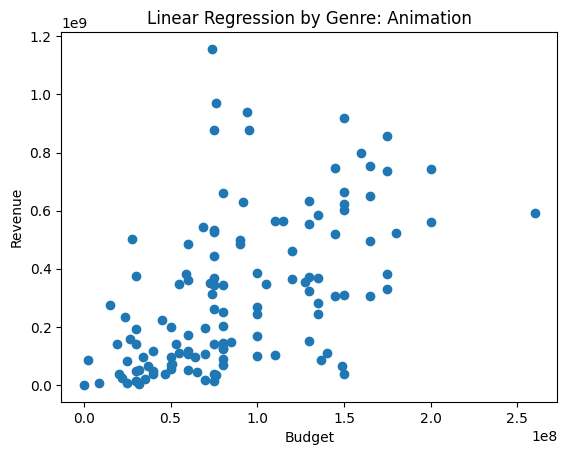

The Animation movie linear regression model is: Revenue = 2.8256394185023876 * Budget + 62146693.69598353
Average MSE: 6.853260211695682e+16
Average RMSE: 261.78732229990976 million



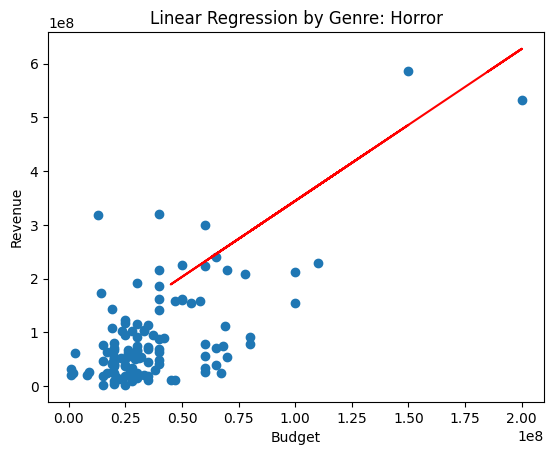

The Horror movie linear regression model is: Revenue = 2.2561703150920933 * Budget + 5682045.053357348
Average MSE: 9541134274027282.0
Average RMSE: 97.67872989564965 million



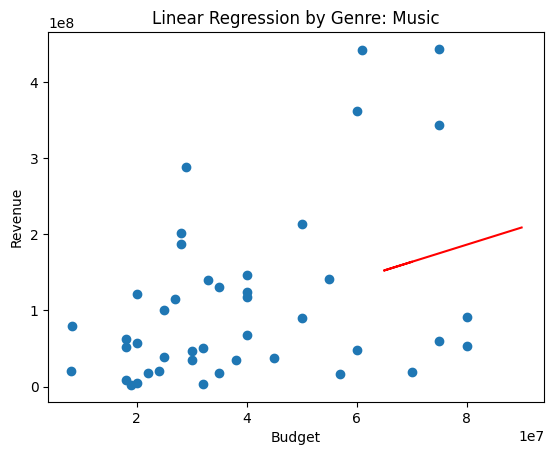

The Music movie linear regression model is: Revenue = 2.319012006682347 * Budget + 17846019.54431936
Average MSE: 754940523767091.2
Average RMSE: 27.476181025882966 million



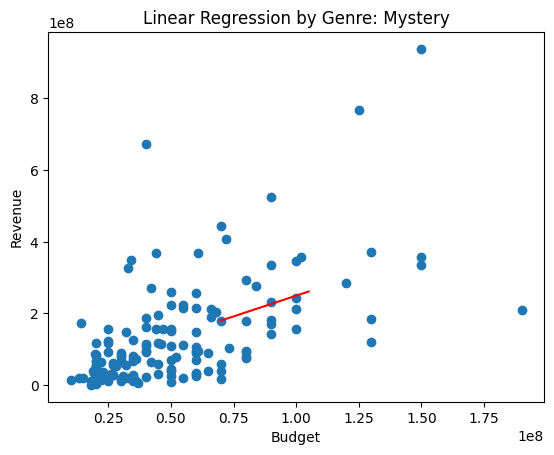

The Mystery movie linear regression model is: Revenue = 2.5859824031784076 * Budget + 867785.741385892
Average MSE: 2.5733741966104252e+16
Average RMSE: 160.4173992000377 million



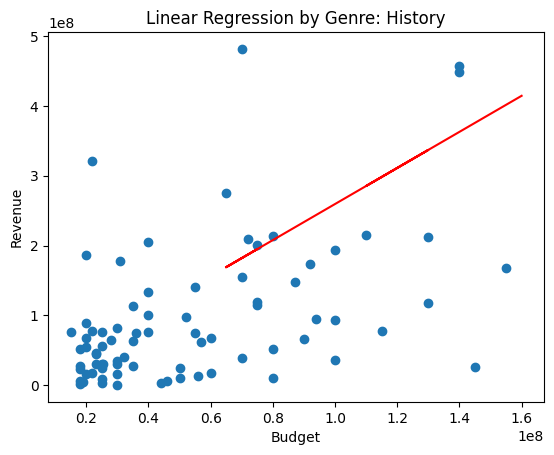

The History movie linear regression model is: Revenue = 1.3675011733439486 * Budget + 22708763.828149557
Average MSE: 879324443335913.5
Average RMSE: 29.653405257000642 million



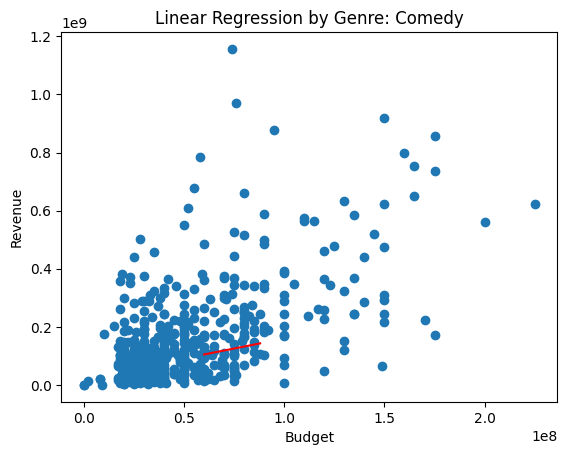

The Comedy movie linear regression model is: Revenue = 2.762255568810035 * Budget + 13368474.261733413
Average MSE: 2.958934077701888e+16
Average RMSE: 172.0155248139507 million



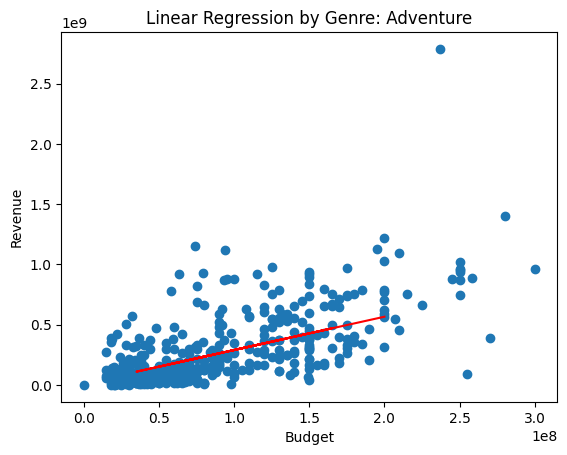

The Adventure movie linear regression model is: Revenue = 3.38291042170324 * Budget + -16129755.876659572
Average MSE: 7.635022812975544e+16
Average RMSE: 276.31545040000105 million



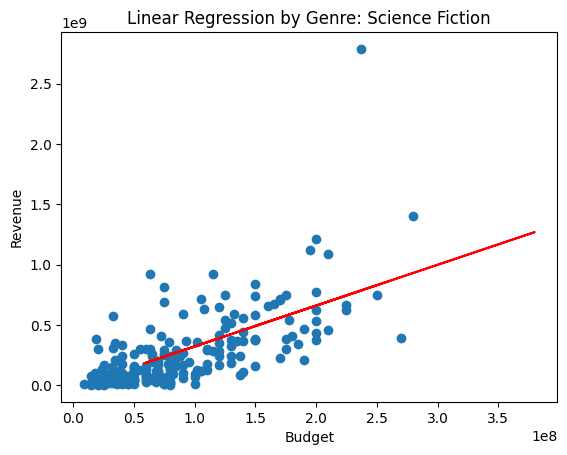

The Science Fiction movie linear regression model is: Revenue = 3.6233984965306947 * Budget + -54603999.62743053
Average MSE: 9.291911498203827e+16
Average RMSE: 304.8263685806041 million



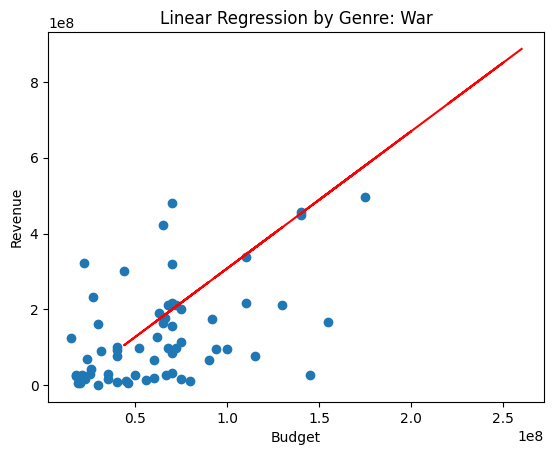

The War movie linear regression model is: Revenue = 1.7627509049287564 * Budget + 19203115.591917545
Average MSE: 9.081093947907496e+16
Average RMSE: 301.3485348878852 million



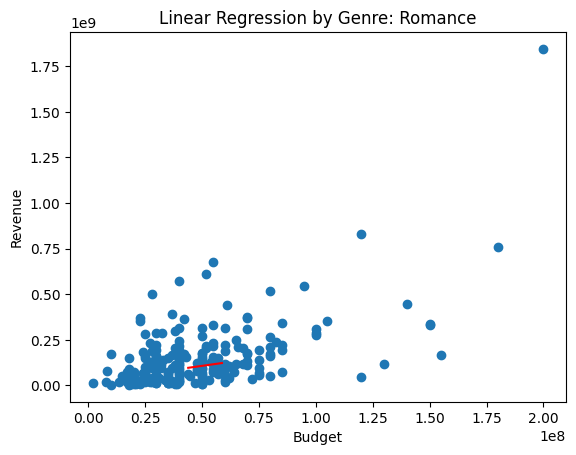

The Romance movie linear regression model is: Revenue = 3.5914391856289734 * Budget + -22988488.637411147
Average MSE: 3.612932359485897e+16
Average RMSE: 190.07715169072523 million



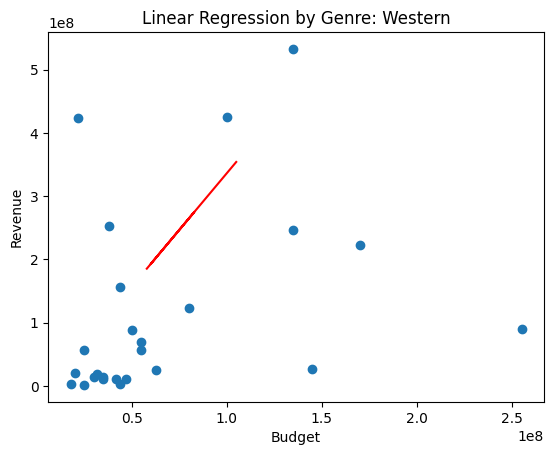

The Western movie linear regression model is: Revenue = 0.8434323064943097 * Budget + 58646645.75838694
Average MSE: 1217062747508094.2
Average RMSE: 34.8864264078179 million



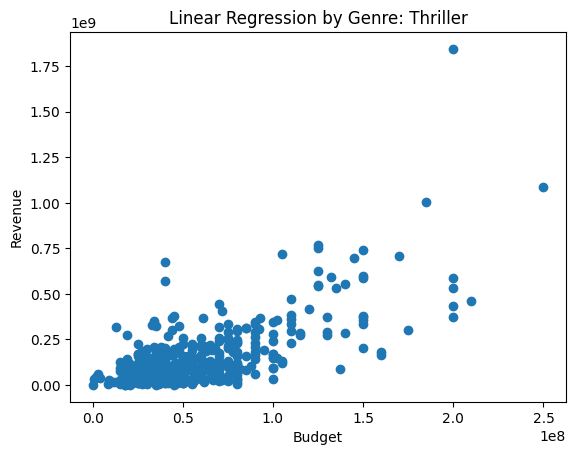

The Thriller movie linear regression model is: Revenue = 3.1732520479552866 * Budget + -37089785.055214226
Average MSE: 4.658651051343874e+16
Average RMSE: 215.83908476788613 million



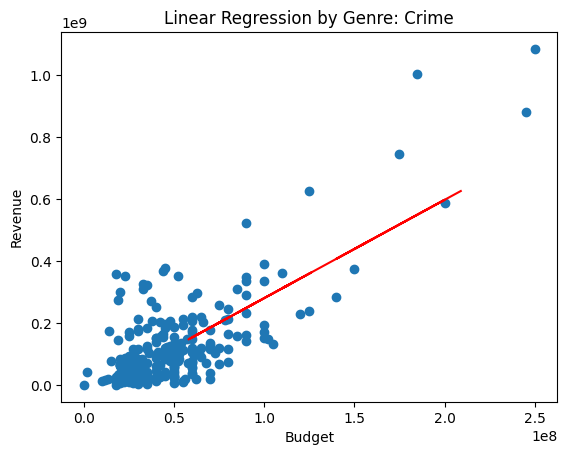

The Crime movie linear regression model is: Revenue = 3.267951151531755 * Budget + -32137526.977640063
Average MSE: 1.6389136140017786e+16
Average RMSE: 128.02006147482427 million



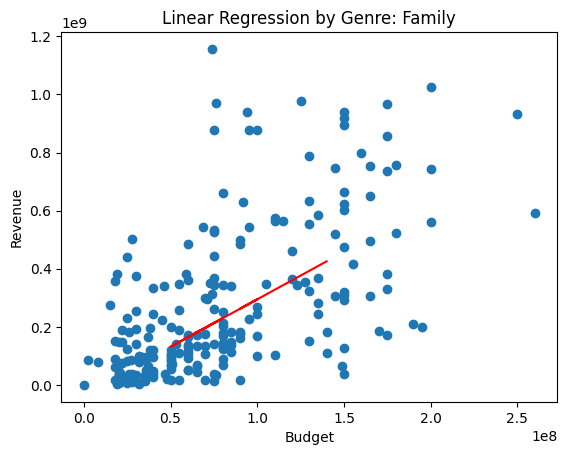

The Family movie linear regression model is: Revenue = 3.0758828422420263 * Budget + 25672636.027427047
Average MSE: 5.408851467621654e+16
Average RMSE: 232.56937604985 million



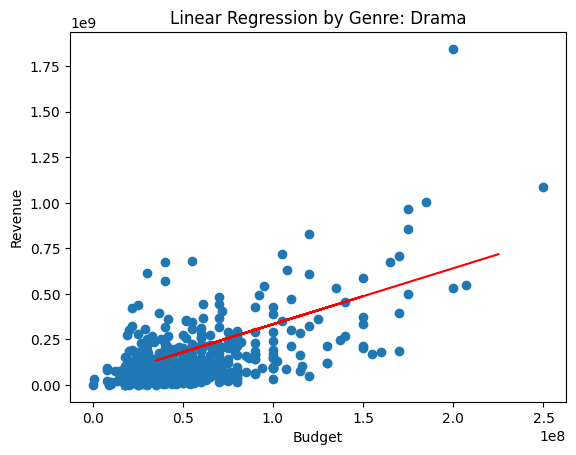

The Drama movie linear regression model is: Revenue = 3.000653533993919 * Budget + -21674593.82271239
Average MSE: 3.668840469530166e+16
Average RMSE: 191.542174716958 million



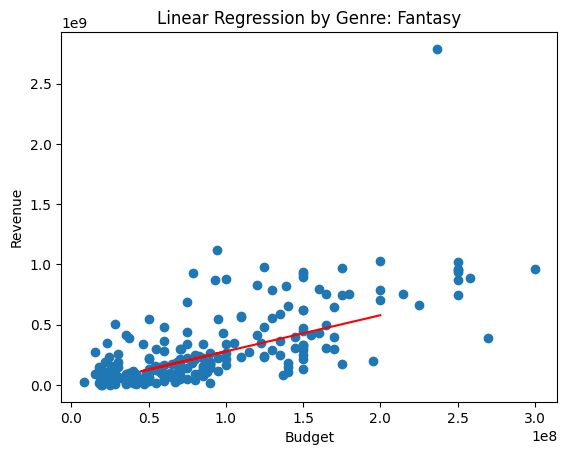

The Fantasy movie linear regression model is: Revenue = 3.695691536550324 * Budget + -36182960.33793378
Average MSE: 5.7994925023785624e+16
Average RMSE: 240.8213549994801 million



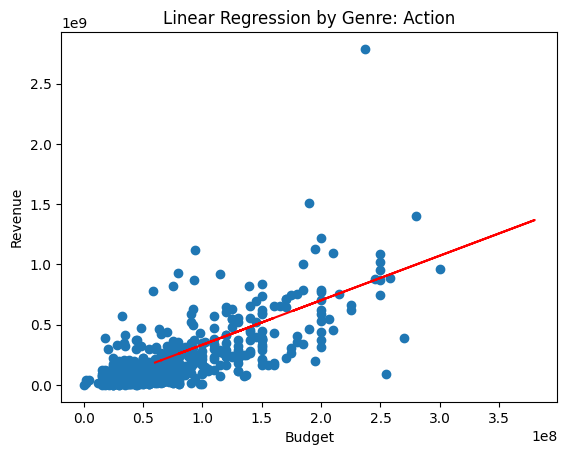

The Action movie linear regression model is: Revenue = 3.433947847921911 * Budget + -49196657.02552301
Average MSE: 6.156170303724652e+16
Average RMSE: 248.11630949465317 million



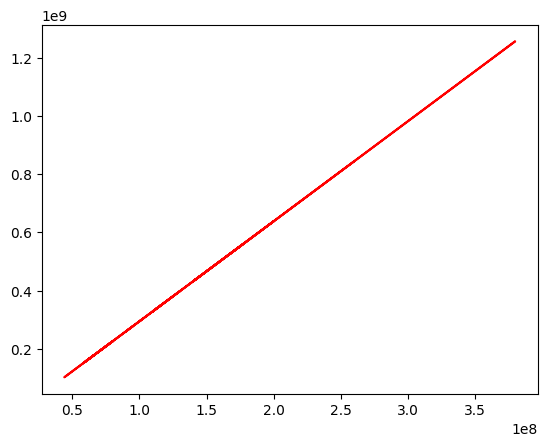

In [ ]:
for g in distinct_genres:
    if(testX.get(g) and testY.get(g) and trainX.get(g) and trainY.get(g)):
        # Gets all coordinates for x and y
        # xTrain = np.array(trainX.get(g)).reshape((-1, 1))
        # yTrain = np.array(trainY.get(g))
        # xTest = np.array(testX.get(g)).reshape((-1, 1))
        # yTest = np.array(testY.get(g))
        xTrain = np.array(trainX[g]).reshape((-1, 1))
        yTrain = np.array(trainY[g])
        xTest = np.array(testX[g]).reshape((-1, 1))
        yTest = np.array(testY[g])

        # Creates LinearRegression object
        m4 = LinearRegression()
        m4.fit(xTrain,yTrain)
        # Creates regression line based off coordinates
        pyplt.scatter(xTrain,yTrain)
        # Labels and organization
        pyplt.xlabel("Budget")
        pyplt.ylabel("Revenue")
        title = "Linear Regression by Genre: " + g
        pyplt.title(title)
        pyplt.show()

        # Gets variables for solving RMSE and MSE
        m4 = m4.fit(xTrain,yTrain)
        coef.append(m4.coef_[0])
        intercept.append(m4.intercept_)
        predictions = m4.predict(xTest)
        pyplt.plot(xTest, predictions, color="red")


        MSE = np.mean((yTest - predictions) ** 2)


        m4coef_ = np.array([np.mean(coef)])
        m4intercept_ = np.mean(intercept)
        print("The " + g + " movie linear regression model is: Revenue = " + str(m4.coef_[0]) + " * Budget + " + str(m4.intercept_))

        # MSE_average = np.mean(MSE)
        print("Average MSE:", MSE)
        print("Average RMSE:", MSE ** 0.5 / 1000000, 'million\n')

Here we have cross-validation using the applications of kfolding. As a result of kfolding and cross validation, the MSE has actually increased compared to without using cross validation drastically. Consequently, RMSE also increases since the RMSE is formulated from the MSE. In hindsight, a change that can improve this can be by removing outliers as stated before in addition to having a more diverse training set. Moreover, due to a bad test set the red line being the prediction line of the test set does not set a good prediction line due to the lack of selected movies in certain budgets.